In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
#read in file

fname= "repd-january-2023.xlsx" 
repd = pd.read_excel(fname, sheet_name = 'REPD')
repd.head()


,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref,planning stage,time to approval,Lon,Lat
0,N00053B,1,2009-07-07,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,NaT,NaT,NaT,2006-05-01,2007-05-01,NaN,planning granted,140,51.387471,-3.406610
1,AA110,2,2017-11-20,Orsted (formerly Dong Energy) / Peel Energy,Hunterston - cofiring,Biomass (co-firing),NaN,NaN,170.0,No,...,NaT,NaT,NaT,NaT,NaT,NaN,withdrawn,,55.735807,-4.888574
2,B0730,3,2020-06-04,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,NaT,NaT,2020-10-28,2016-09-01,2019-12-20,NaN,planning granted,434,53.716417,-1.281885
3,1106000,4,2003-12-18,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.5,No,...,NaT,NaT,NaT,NaT,1998-10-02,NaN,planning granted,316,52.448628,0.725273
4,2047000,5,2005-09-29,Agrigen,Nunn Mills Road Biomass Plant,Biomass (dedicated),NaN,NaN,8.8,No,...,NaT,NaT,NaT,NaT,NaT,NaN,refused,,52.230195,-0.881341


In [30]:
#create technology categories from technology type

#large hydro, solar and fuelcell hydrogen missing from GIS maps

# repd['Technology Category'] =repd['Technology Type']
# repd.head()
repd.loc[(repd['Technology Type'] == 'Tidal Barrage and Tidal Stream')|
         (repd['Technology Type'] == 'Shoreline Wave')|
         (repd['Technology Type'] == 'Small Hydro')|
         (repd['Technology Type'] == 'Large Hydro')|
         (repd['Technology Type'] == 'Wind Offshore')|
         (repd['Technology Type'] == 'Wind Onshore'), 'Technology Category'] = 'Kinetic' 
         
         
repd.loc[(repd['Technology Type'] == 'EfW Incineration')|
         (repd['Technology Type'] == 'Sewage Sludge Digestion')|
         (repd['Technology Type'] == 'Anaerobic Digestion')|
         (repd['Technology Type'] == 'Advanced Conversion Technologies')|
         (repd['Technology Type'] == 'Landfill Gas')
        , 'Technology Category'] = 'Waste Management' 

repd.loc[(repd['Technology Type'] == 'Liquid Air Energy Storage')|
         (repd['Technology Type'] == 'Pumped Storage Hydroelectricity')|
         (repd['Technology Type'] == 'Compressed Air Energy Storage')|
         (repd['Technology Type'] == 'Battery')
         , 'Technology Category'] = 'Energy Storage' 

#geothermmal has whitespace so remove:
repd['Technology Type'] = repd['Technology Type'].str.strip()

repd.loc[(repd['Technology Type'] == 'Geothermal')|
         (repd['Technology Type'] == 'Hot Dry Rocks (HDR)')|
         (repd['Technology Type'] == 'Solar Photovoltaics')|
         (repd['Technology Type'] == 'Hydrogen')|
         (repd['Technology Type'] == 'Fuel Cell (Hydrogen)')|
         (repd['Technology Type'] == 'Flywheels')|
         (repd['Technology Type'] == 'Biomass (co-firing)')|
         (repd['Technology Type'] == 'Biomass (dedicated)')
         , 'Technology Category'] = 'Other' 
repd['Technology Category'].value_counts(normalize=True)

Other               0.527385
Kinetic             0.262367
Waste Management    0.131846
Energy Storage      0.078401
Name: Technology Category, dtype: float64

In [4]:
repd.value_counts('Development Status (short)') 

Development Status (short)
Operational                    2827
Awaiting Construction          1739
Application Submitted           986
Application Refused             973
Application Withdrawn           507
Revised                         483
Abandoned                       367
Planning Permission Expired     277
Under Construction              239
Appeal Withdrawn                 48
Decommissioned                   31
No Application Required           6
Appeal Lodged                     4
dtype: int64

In [5]:
# only include installations that are operational, under construction or awaiting construction
repd = repd[
                (repd['Development Status (short)'] == 'Operational' )| 
                (repd['Development Status (short)'] == 'Awaiting Construction' )| 
                (repd['Development Status (short)'] == 'Under Construction' ) 
               ]

In [6]:
#remove installations where the capacity is unknown

repd.dropna(subset=['Installed Capacity (MWelec)'], inplace = True)

What are the most common technology types?

In [7]:
repd['Technology Type'].value_counts(normalize=True)

Solar Photovoltaics                 0.499117
Wind Onshore                        0.217977
Battery                             0.075972
Landfill Gas                        0.060512
Anaerobic Digestion                 0.037986
Biomass (dedicated)                 0.025177
Small Hydro                         0.022527
EfW Incineration                    0.022306
Wind Offshore                       0.014355
Advanced Conversion Technologies    0.008392
Large Hydro                         0.005080
Sewage Sludge Digestion             0.002650
Tidal Barrage and Tidal Stream      0.001988
Pumped Storage Hydroelectricity     0.001767
Hydrogen                            0.001767
Biomass (co-firing)                 0.000663
Liquid Air Energy Storage           0.000442
Hot Dry Rocks (HDR)                 0.000442
Shoreline Wave                      0.000442
Flywheels                           0.000221
Compressed Air Energy Storage       0.000221
Name: Technology Type, dtype: float64

In [8]:
#overview of each technology type with min, max, mean mode.  Count included so we can see total number of installations within each type.

type_range = repd.groupby('Technology Type').agg({'Installed Capacity (MWelec)':["min", "max","mean","median","count"]})
type_range 

Installed Capacity (MWelec)          \
                                                         min     max   
Technology Type                                                        
Advanced Conversion Technologies                       1.100    48.0   
Anaerobic Digestion                                    0.200    19.0   
Battery                                                0.100   400.0   
Biomass (co-firing)                                   18.000   645.0   
Biomass (dedicated)                                    0.156   645.0   
Compressed Air Energy Storage                          5.000     5.0   
EfW Incineration                                       1.200   100.0   
Flywheels                                            400.000   400.0   
Hot Dry Rocks (HDR)                                    3.000     7.0   
Hydrogen                                               0.800    10.0   
Landfill Gas                                           1.000    22.5   
Large Hydro                                            5.000   100.0   
Liquid Air Energy Storage                              5.000    49.9   
Pumped Storage Hydroelectricity                       99.900  1728.0   
Sewage Sludge Digestion                                1.100     9.7   
Shoreline Wave                                         1.000    23.0   
Small Hydro                                            0.185     4.5   
Solar Photovoltaics                                    0.150   350.0   
Tidal Barrage and Tidal Stream                         0.500   240.0   
Wind Offshore                                          7.000  2400.0   
Wind Onshore                                           0.150   443.0   

                                                            
                                        mean  median count  
Technology Type                                             
Advanced Conversion Technologies   13.760526   10.10    38  
Anaerobic Digestion                 2.366570    1.85   172  
Battery                            38.857703   25.00   344  
Biomass (co-firing)               232.666667   35.00     3  
Biomass (dedicated)                34.582939    5.25   114  
Compressed Air Energy Storage       5.000000    5.00     1  
EfW Incineration                   26.591089   20.10   101  
Flywheels                         400.000000  400.00     1  
Hot Dry Rocks (HDR)                 5.000000    5.00     2  
Hydrogen                            4.250000    3.40     8  
Landfill Gas                        2.940511    2.00   274  
Large Hydro                        20.460870   15.00    23  
Liquid Air Energy Storage          27.450000   27.45     2  
Pumped Storage Hydroelectricity   659.737500  420.00     8  
Sewage Sludge Digestion             4.183333    4.75    12  
Shoreline Wave                     12.000000   12.00     2  
Small Hydro                         1.741029    1.85   102  
Solar Photovoltaics                 7.858392    4.40  2260  
Tidal Barrage and Tidal Stream     41.988889    6.00     9  
Wind Offshore                     481.986154  286.50    65  
Wind Onshore                       20.464630    9.20   987

Looking at the median installed capacity (so that any individual large or small installations don't skew the values), Flywheels (400MW), Pumped Storage Hydroelectricity(420MW) and Wind Offshore(286.5MW) have the largest capacities however there is only one flywheel installation and 8 pumped storage hydroelectric. However offshore wind has 65 installations ranging from 7MW to 2400MW capacities. Solar has the largest number of installations (2203) with an installed capacity range of 0.150MW - 350MW, with a median of 4.60MW.

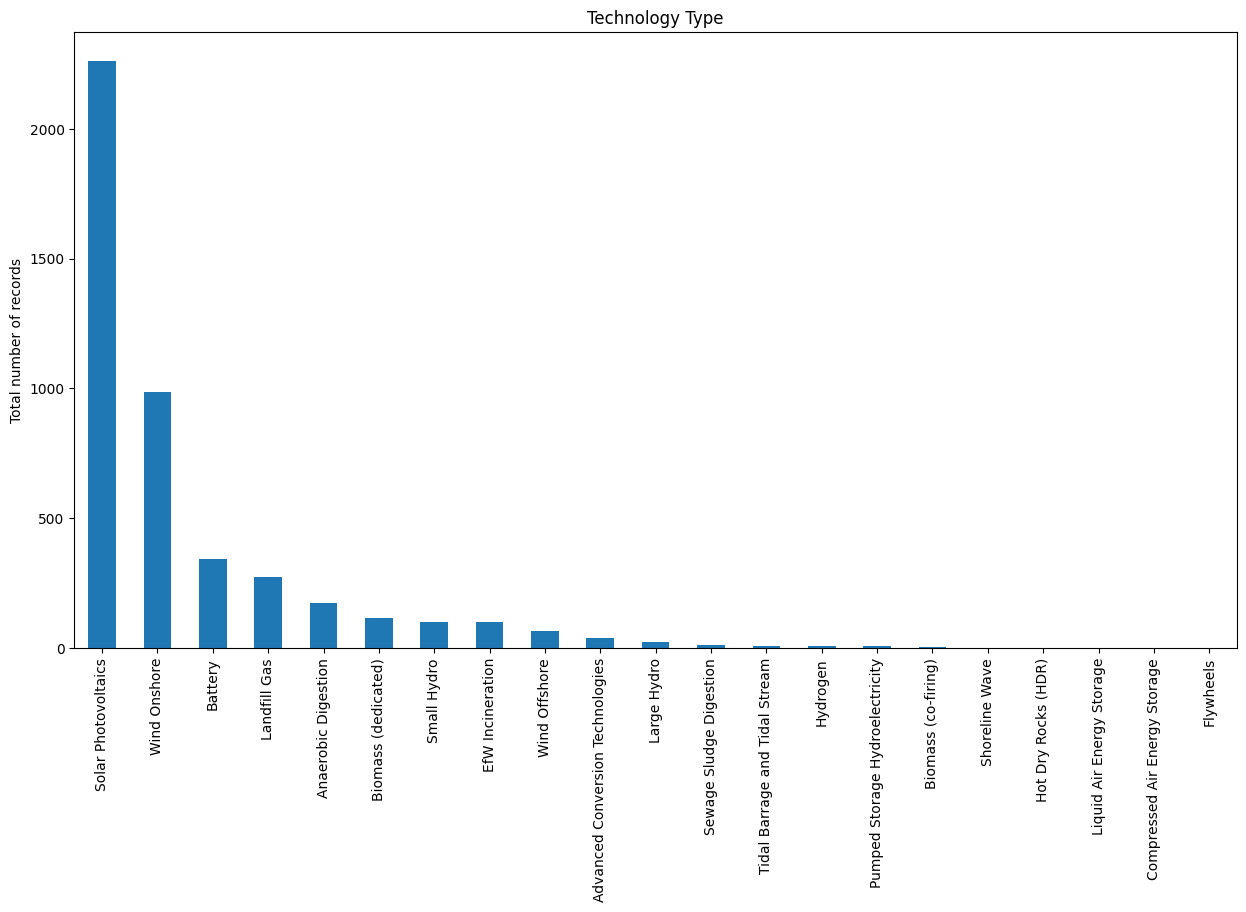

In [9]:
# counts for each installation type

types = repd.value_counts('Technology Type').plot(kind = 'bar', figsize=(15,8))

plt.title('Technology Type')
plt.xticks(rotation = 90)
plt.ylabel('Total number of records')
plt.xlabel('')
plt.show()

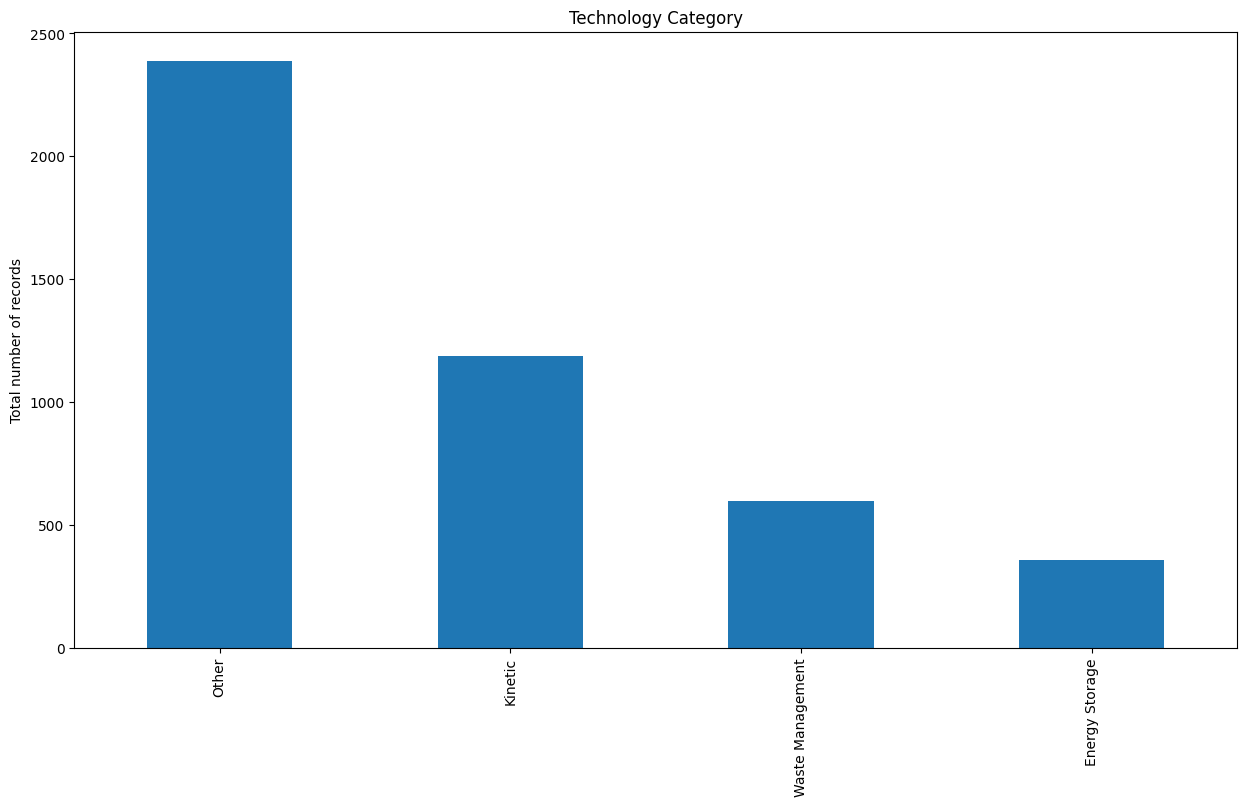

In [28]:
# counts for each category

types = repd.value_counts('Technology Category').plot(kind = 'bar', figsize=(15,8))

plt.title('Technology Category')
plt.xticks(rotation = 90)
plt.ylabel('Total number of records')
plt.xlabel('')
plt.show()

What are the installed capacities?

In [10]:
# plot the total capacities for each technology type

type_grouped = repd.groupby(['Technology Type'])['Installed Capacity (MWelec)'].sum().sort_values(ascending=False)
type_grouped 

Technology Type
Wind Offshore                       31329.10000
Wind Onshore                        20198.59030
Solar Photovoltaics                 17759.96531
Battery                             13367.05000
Pumped Storage Hydroelectricity      5277.90000
Biomass (dedicated)                  3942.45500
EfW Incineration                     2685.70000
Landfill Gas                          805.70000
Biomass (co-firing)                   698.00000
Advanced Conversion Technologies      522.90000
Large Hydro                           470.60000
Anaerobic Digestion                   407.05000
Flywheels                             400.00000
Tidal Barrage and Tidal Stream        377.90000
Small Hydro                           177.58500
Liquid Air Energy Storage              54.90000
Sewage Sludge Digestion                50.20000
Hydrogen                               34.00000
Shoreline Wave                         24.00000
Hot Dry Rocks (HDR)                    10.00000
Compressed Air Energy St

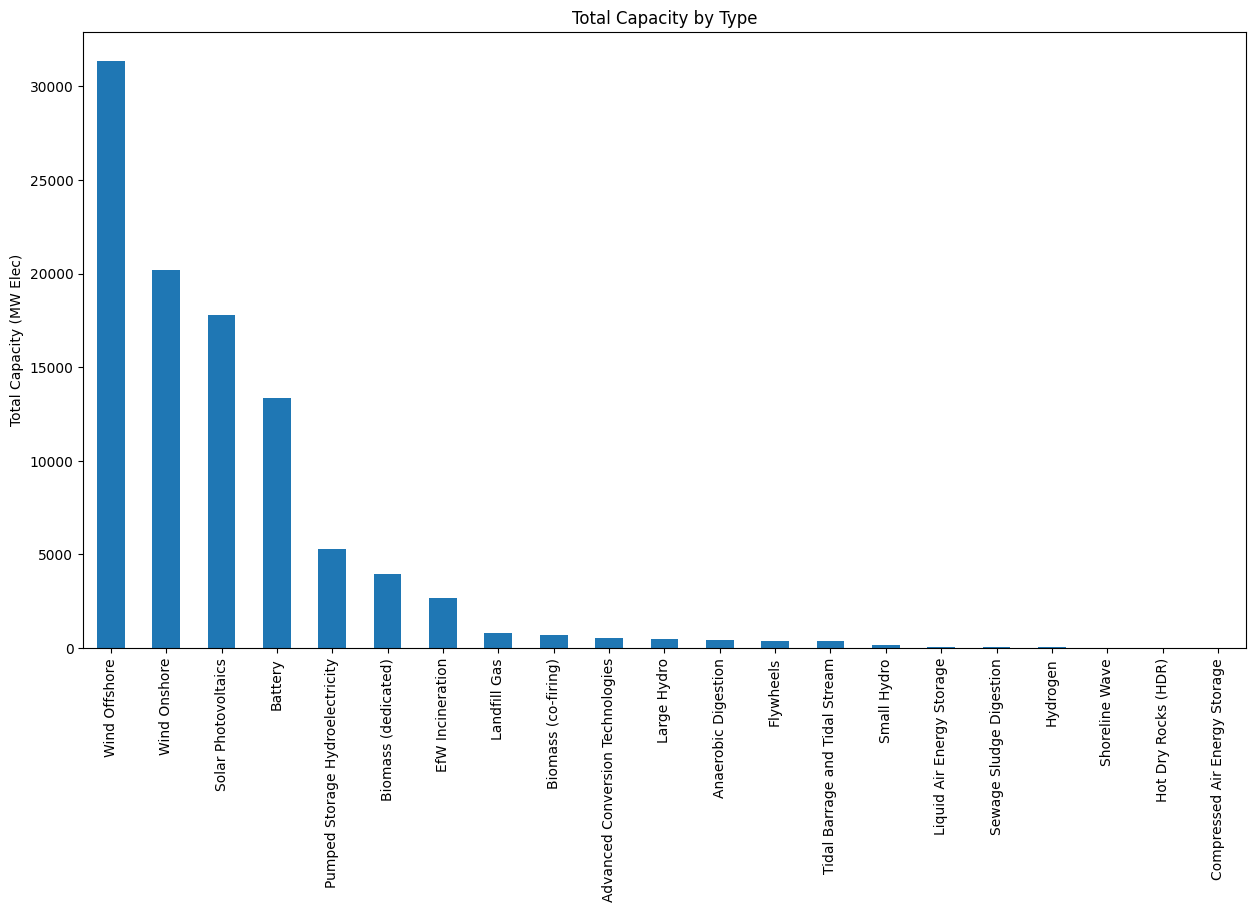

In [11]:
type_grouped.plot(kind = 'bar', figsize=(15,8))

plt.title('Total Capacity by Type')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Total Capacity (MW Elec)')

plt.show()

In [12]:
# plot the median capacities for each technology type

type_median = repd.groupby('Technology Type')['Installed Capacity (MWelec)'].median().sort_values(ascending=False)
type_median

Technology Type
Pumped Storage Hydroelectricity     420.00
Flywheels                           400.00
Wind Offshore                       286.50
Biomass (co-firing)                  35.00
Liquid Air Energy Storage            27.45
Battery                              25.00
EfW Incineration                     20.10
Large Hydro                          15.00
Shoreline Wave                       12.00
Advanced Conversion Technologies     10.10
Wind Onshore                          9.20
Tidal Barrage and Tidal Stream        6.00
Biomass (dedicated)                   5.25
Hot Dry Rocks (HDR)                   5.00
Compressed Air Energy Storage         5.00
Sewage Sludge Digestion               4.75
Solar Photovoltaics                   4.40
Hydrogen                              3.40
Landfill Gas                          2.00
Anaerobic Digestion                   1.85
Small Hydro                           1.85
Name: Installed Capacity (MWelec), dtype: float64

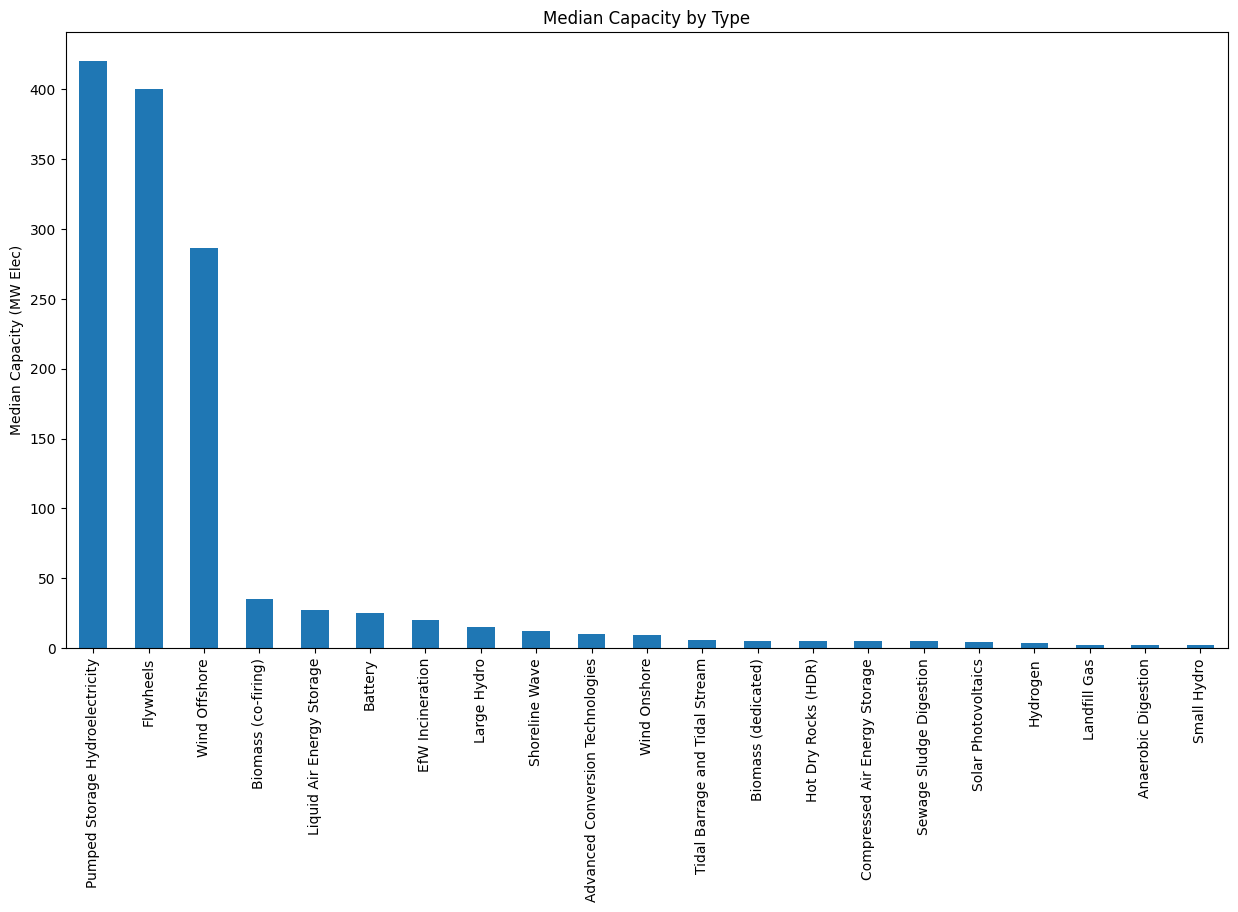

In [13]:
type_median.plot(kind = 'bar', figsize=(15,8))

plt.title('Median Capacity by Type')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Median Capacity (MW Elec)')

plt.show()

## Review installed capacity for solar and wind further
From inital review of the datasource there appeared to be a large number of developments with low installed capacities. Checking this further to see range of installed capacities for solar and onshore wind.

In [14]:
# subset data for solar only and the installed capacity

solar =  repd[['Technology Type', 'Installed Capacity (MWelec)']]
solar = solar [(solar['Technology Type'] == 'Solar Photovoltaics' )]

In [15]:
solar.describe()

,Installed Capacity (MWelec)
count,2260.000000
mean,7.858392
std,14.059057
min,0.150000
25%,0.605750
50%,4.400000
75%,7.625000
max,350.000000


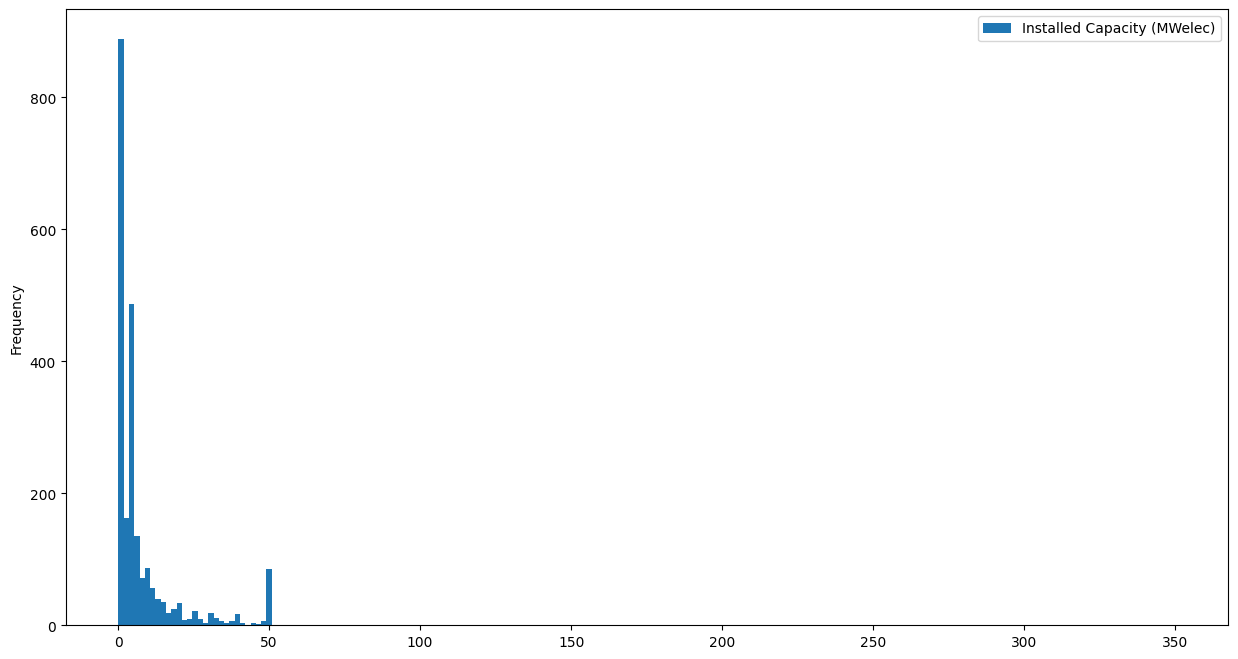

In [16]:
solar.plot(kind = 'hist', bins =200, figsize=(15,8))
plt.show()

## high number of installations at low capacity

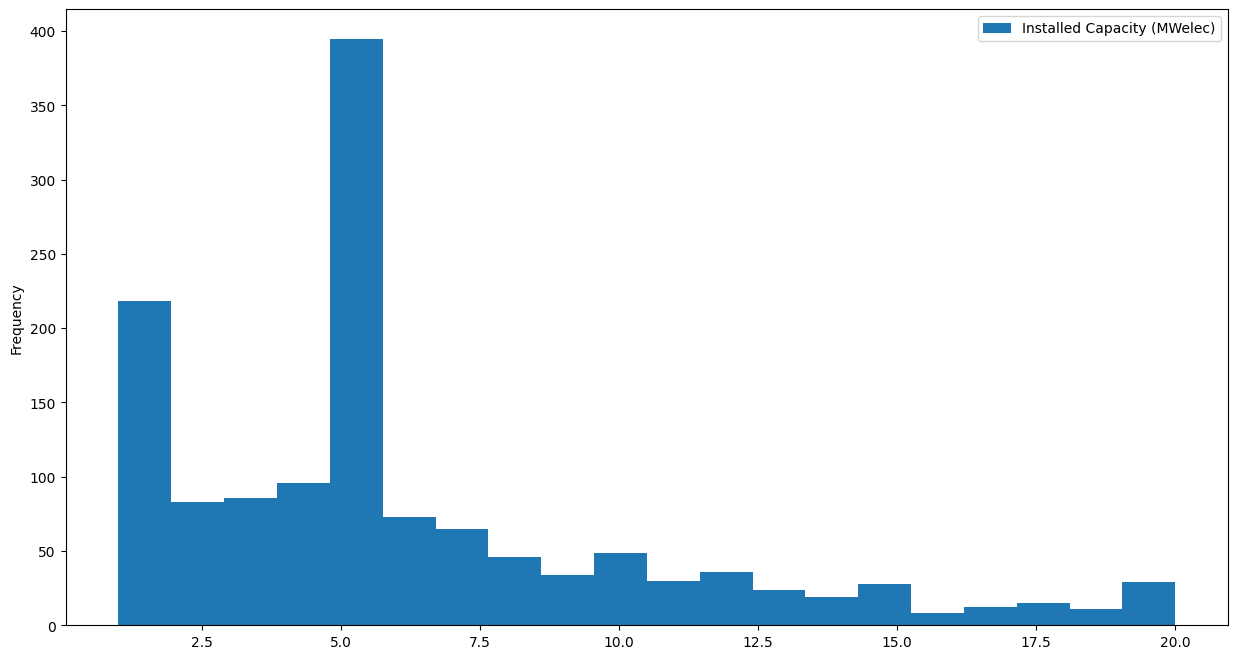

In [17]:
#narrow the range to lower bins only
solar.plot(kind = 'hist', range=[1, 20], bins =20, figsize=(15,8))
plt.show()

# subset the data for onshore wind and number of turbines



In [18]:
os_wind = repd[['Technology Type', 'Installed Capacity (MWelec)']] 
os_wind = os_wind [(os_wind['Technology Type'] == 'Wind Onshore' )]

os_wind


,Technology Type,Installed Capacity (MWelec)
2048,Wind Onshore,177.00
2049,Wind Onshore,88.40
2051,Wind Onshore,96.00
2057,Wind Onshore,51.00
2065,Wind Onshore,37.60
...,...,...
7649,Wind Onshore,0.25
7751,Wind Onshore,1.00
7767,Wind Onshore,0.25
7857,Wind Onshore,28.00


In [19]:
os_wind.describe()

,Installed Capacity (MWelec)
count,987.000000
mean,20.464630
std,35.759057
min,0.150000
25%,3.000000
50%,9.200000
75%,23.900000
max,443.000000


<AxesSubplot: ylabel='Frequency'>

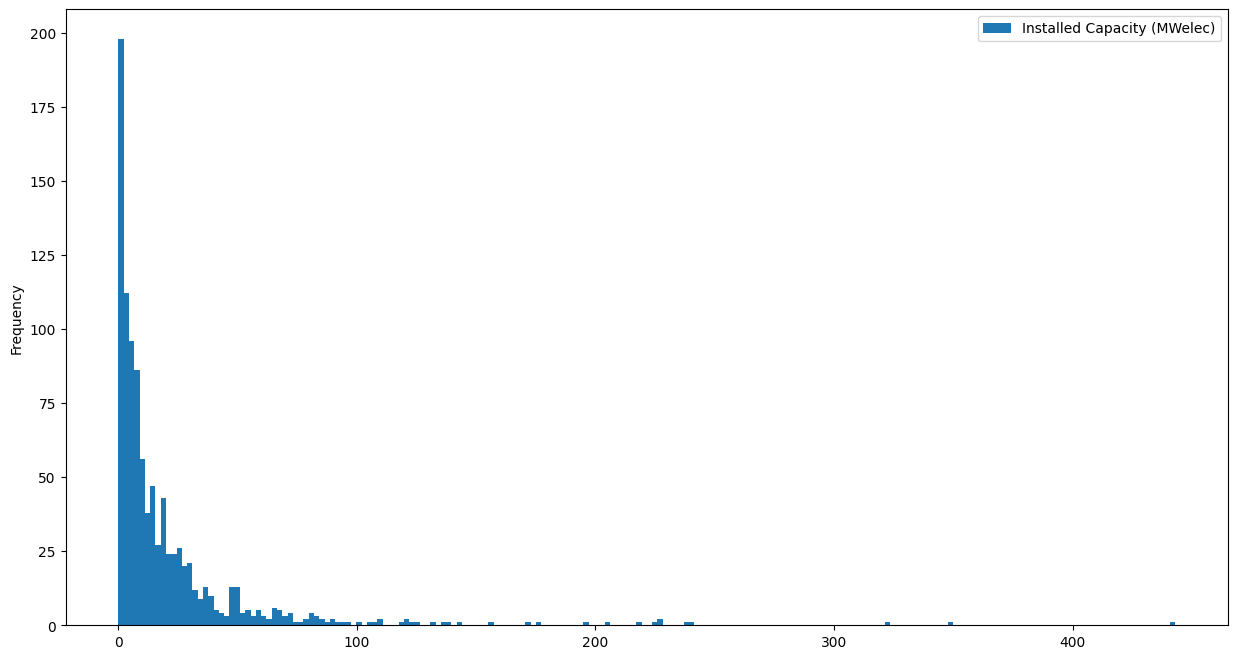

In [20]:
os_wind.plot(kind = 'hist', bins =200, figsize=(15,8))

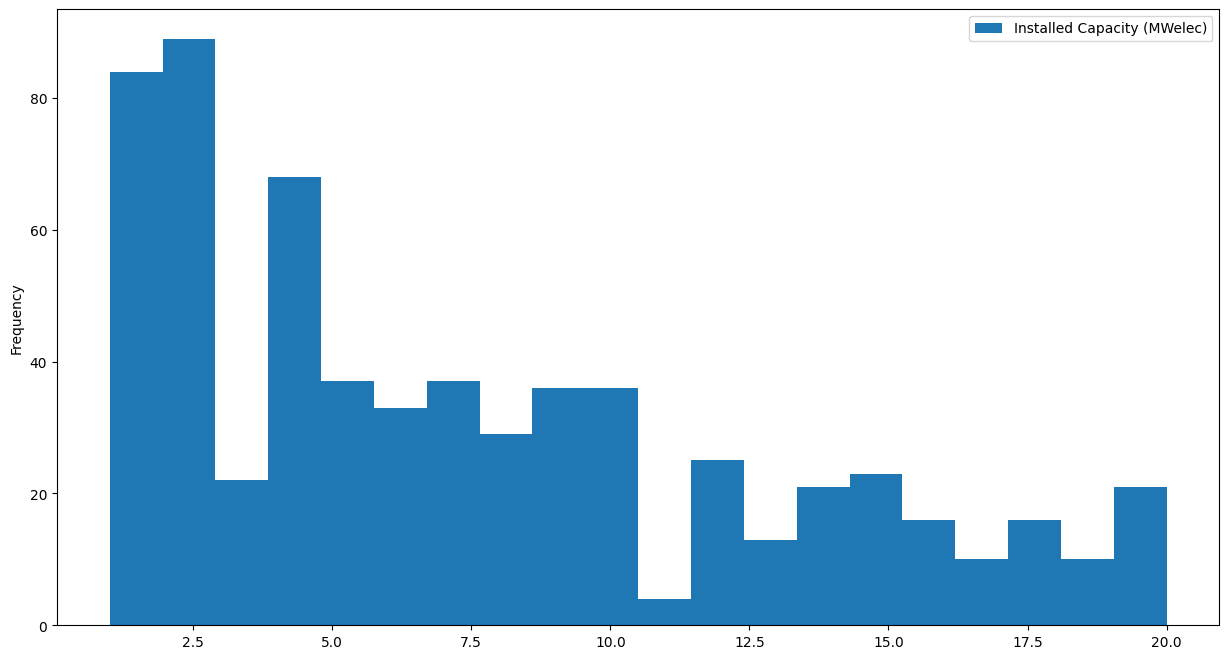

In [21]:
# narrow to lower range

os_wind.plot(kind = 'hist', range=[1, 20], bins =20, figsize=(15,8))
plt.show()

## again large number of installations with small numbers of turbines

## Are there any particular groups of operators/applicants worth reviewing further?
Looking to see if any companies stand out in terms of renewable investment.

In [22]:
operators =  repd[['Operator (or Applicant)','Technology Type', 'Installed Capacity (MWelec)','CfD Capacity (MW)', 'RO Banding (ROC/MWh)' ]]

In [23]:
operators.value_counts('Operator (or Applicant)').head(30)

Operator (or Applicant)
Private Developer                     142
Lightsource Renewable Energy          122
Scottish and Southern Energy (SSE)     55
Anesco                                 46
Waste Recycling Group                  45
WM Morrisons Supermarkets Plc          41
Scottish Power Renewables              32
Renewable Energy Systems (RES)         29
Biffa                                  29
RWE npower                             23
Foresight                              23
British Solar Renewables               22
Lark Energy                            21
Viridor                                20
Push Energy                            20
EDF Energy Renewables                  19
SITA UK                                19
Green Cat Renewables                   18
Lightsource BP                         18
Wessex Solar Energy                    17
Natural Power                          17
Ecotricity                             17
Elgin Energy EsCo                      16
TGC Renewa

In [24]:
#operators.head()
#create new df to determkine how mny of each installation
op = operators[['Operator (or Applicant)','Technology Type']]

op = op.groupby(['Operator (or Applicant)','Technology Type']).size().reset_index(name='count')
op
# op.plot(kind = 'bar', stacked= True )
# plt.show()

,Operator (or Applicant),Technology Type,count
0,E.ON UK,Wind Offshore,1
1,2020 Renewables/ Forsa Energy,Wind Onshore,1
2,2020 Renewables/ NTR,Wind Onshore,2
3,21st Century Homes,Solar Photovoltaics,1
4,35 Degrees,Solar Photovoltaics,1
...,...,...,...
2580,Zestec Renewable Energy,Solar Photovoltaics,1
2581,Zetex Plc,Battery,1
2582,juwi Renewable Energies,Solar Photovoltaics,4
2583,m03 Power,Solar Photovoltaics,1


Lightsource is a BP company  https://lightsourcebp.com/uk/ 

#### Look at those that are approved for CfD as these may be better options for investment.

Contracts for difference (CfDs) incentivise investment in renewable energy by providing developers of projects with high upfront costs and long lifetimes with direct protection from volatile wholesale prices, and they protect consumers from paying increased support costs when electricity prices are high. This scheme replaces RO and FiT.

In [25]:
 # remove CfD Nan

cfd = operators.dropna(subset=['CfD Capacity (MW)'], inplace = False)

In [26]:
cfd.value_counts('Operator (or Applicant)').head(20)

Operator (or Applicant)
BayWa r.e. UK Limited                                6
Scottish Power Renewables                            6
Lightsource BP                                       5
Orsted (formerly Dong Energy)                        5
Elgin Energy                                         4
Moray East (formerly MORL)/ EDPR                     3
Banks Renewables                                     3
Anesco Limited                                       3
Intelligent Alternatives                             2
Enso Energy Limited                                  2
SSE/Equinor (formerly Statoil, formerly Forewind)    2
Innogy                                               2
Innova Renewables Limited                            2
JBM Solar Projects Limited                           2
Vantage RE                                           2
Low Carbon                                           2
British Solar Renewables / BayWa r.e. UK Limited     2
Voltalia UK                              

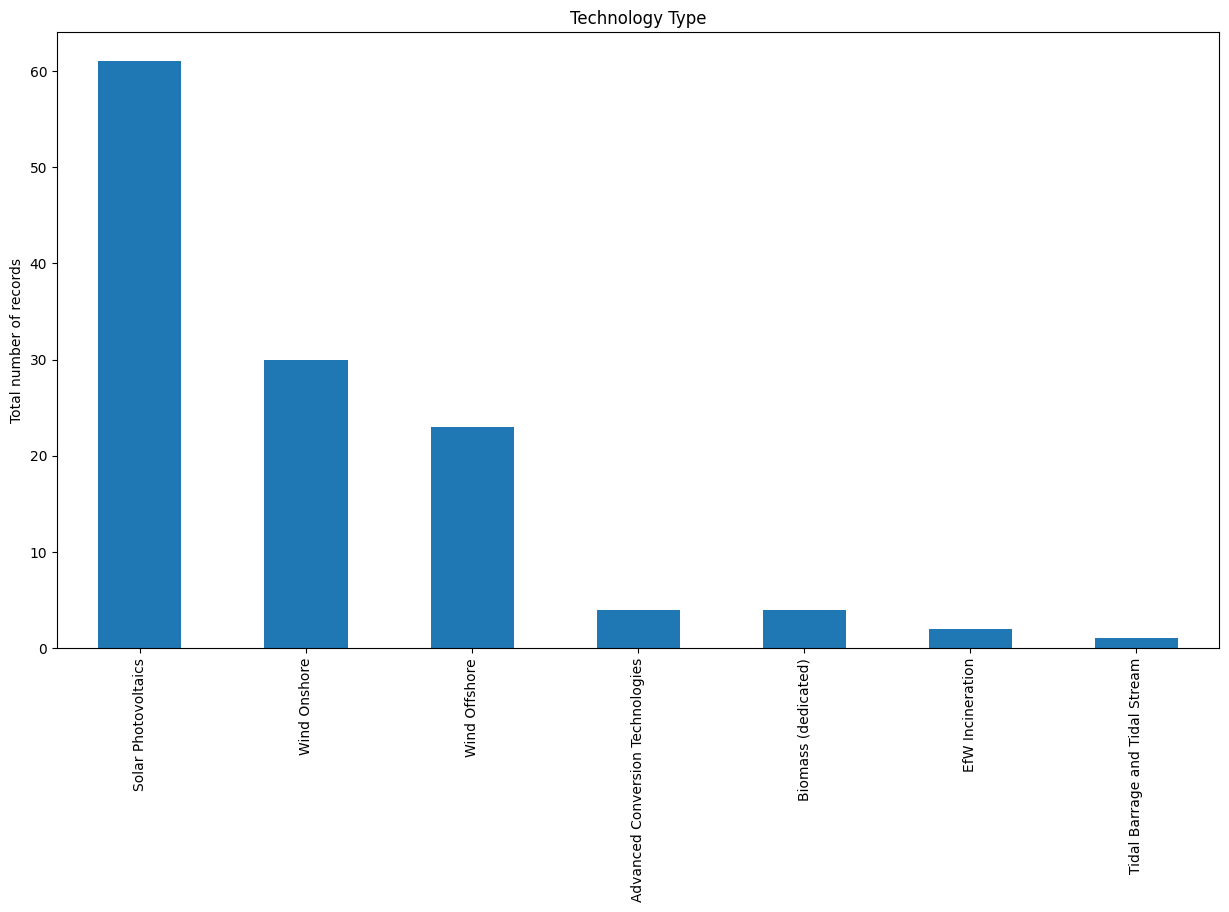

In [27]:
# plot most common technologies that include CfD.

cfd.value_counts('Technology Type').plot(kind = 'bar', figsize=(15,8))

plt.title('Technology Type')
plt.xticks(rotation = 90)
plt.ylabel('Total number of records')
plt.xlabel('')
plt.show()